<a href="https://colab.research.google.com/github/badrishdavey/datascience_lab/blob/master/Session_6_Pandas_and_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discussion on Matrix Multiplication + Inverse as a Machine Learning Tool

In [0]:
import numpy as np

In [0]:
X = np.random.randn(4, 4)
X_future = np.random.randn(5, 4)

In [0]:
X

array([[ 0.07691159,  0.35409567, -0.91882971, -0.76344449],
       [-0.50316168,  0.66068731, -0.89597289,  0.38624099],
       [-0.20891896,  0.40601186, -1.58239536,  0.67318069],
       [ 1.88786298,  0.33273199,  2.99857897, -0.06873962]])

In [0]:
X_future

array([[ 1.26468482e-01, -8.58945738e-01,  1.18204288e+00,
        -6.42211694e-01],
       [-8.77198622e-01, -1.07871469e-01, -7.83311719e-01,
         1.54525492e+00],
       [ 7.91620111e-01, -1.77939692e-01,  5.12771770e-01,
         1.35073926e-01],
       [ 1.42972852e-01, -3.89283299e-01, -9.29564601e-01,
         6.13223545e-05],
       [ 6.57168860e-01,  1.45225514e+00, -1.46564460e-01,
        -1.85611955e+00]])

In [0]:
def get_y(x):
  return(0.3*x[0] + 0.8*x[1] - 5*x[2] + 5*x[3])

Y = np.array([get_y(x) for x in X])
Y_future = np.array([get_y(x) for x in X_future])

In [0]:
Y

array([  1.08327609,   6.78867075,  11.54001408, -14.50404846])

In [0]:
Y_future

array([-9.77048894, 11.29337645, -1.79335494,  4.37959483, -7.18882067])

$$ Y =X \bullet \beta $$

$$ Y_{future} = X_{future} \bullet \beta $$

$ X^{-1} \bullet Y = X^{-1} \bullet X  \bullet \beta $

$ X^{-1} \bullet Y = I  \bullet \beta $

$ X^{-1} \bullet Y = \beta $

$$ Y_{future} = X_{future} \bullet X^{-1} \bullet Y $$


In [0]:
beta = np.linalg.inv(X).dot(Y)
X_future.dot(beta)

array([-9.77048894, 11.29337645, -1.79335494,  4.37959483, -7.18882067])

In [0]:
beta

array([ 0.3,  0.8, -5. ,  5. ])

In [0]:
np.linalg.inv(X_future)

LinAlgError: ignored

In [0]:
X = np.random.randn(5, 4)

In [0]:
def get_y(x):
  return(3*x[0] + 8*x[1] + 41*x[2] - 0.2 * x[3] + 100)

In [0]:
Y = np.array([get_y(x) for x in X])
Y_future = np.array([get_y(x) for x in X_future])

In [0]:
Y, Y_future

(array([ 99.78123163,  98.97279814, 115.71985874,  98.46983525,
        118.24417921]),
 array([142.10004016,  64.08060091, 121.94797057,  59.20249127,
        107.95162871]))

In [0]:
beta = np.linalg.inv(X[:4]).dot(Y[:4])
X_future.dot(beta)

array([1469.9310269 , -864.59801187,  803.43678057, -949.02932138,
       -554.2693179 ])

In [0]:
np.hstack([X, np.ones((len(X), 1))])

array([[ 4.08467306e-01, -1.87701953e-01,  4.10300453e-04,
        -2.03115091e-01,  1.00000000e+00],
       [ 1.88539411e+00, -1.59160724e-01, -1.38772359e-01,
        -1.39784160e+00,  1.00000000e+00],
       [ 3.51866521e-01,  9.77388216e-01,  1.68920927e-01,
         4.03022790e-01,  1.00000000e+00],
       [ 1.10189989e+00,  1.23505529e-01, -1.39995051e-01,
         4.20557812e-01,  1.00000000e+00],
       [ 1.70811731e-01,  1.83629317e-01,  4.01355832e-01,
         9.64398131e-01,  1.00000000e+00]])

In [0]:
beta = np.linalg.inv(np.hstack([X, np.ones((len(X), 1))])).dot(Y)
np.hstack([X_future, np.ones((len(X_future), 1))]).dot(beta)

array([142.10004016,  64.08060091, 121.94797057,  59.20249127,
       107.95162871])

In [0]:
beta

array([  3. ,   8. ,  41. ,  -0.2, 100. ])

In [0]:
def get_y(x):
  return(3*x[0] + 8*x[1] + 41*x[2] - 0.2 * x[3] + x[2]*x[2])

In [0]:
Y = np.array([get_y(x) for x in X])
Y_future = np.array([get_y(x) for x in X_future])

In [0]:
Y, Y_future

(array([-0.2187682 , -1.00794409, 15.74839302, -1.51056613, 18.40526572]),
 array([ 43.49726554, -35.30582184,  22.21090545, -39.93341838,
          7.97310985]))

In [0]:
X[:, 2] * X[:, 2]

array([1.68346462e-07, 1.92577676e-02, 2.85342795e-02, 1.95986143e-02,
       1.61086504e-01])

In [0]:
np.hstack([X, np.array(X[:,2] * X[:, 2], ndmin=2).T])

array([[ 4.08467306e-01, -1.87701953e-01,  4.10300453e-04,
        -2.03115091e-01,  1.68346462e-07],
       [ 1.88539411e+00, -1.59160724e-01, -1.38772359e-01,
        -1.39784160e+00,  1.92577676e-02],
       [ 3.51866521e-01,  9.77388216e-01,  1.68920927e-01,
         4.03022790e-01,  2.85342795e-02],
       [ 1.10189989e+00,  1.23505529e-01, -1.39995051e-01,
         4.20557812e-01,  1.95986143e-02],
       [ 1.70811731e-01,  1.83629317e-01,  4.01355832e-01,
         9.64398131e-01,  1.61086504e-01]])

In [0]:
beta = np.linalg.inv(np.hstack([X, np.array(X[:,2] * X[:, 2], ndmin=2).T])).dot(Y)
np.hstack([X_future, np.array(X_future[:,2] * X_future[:, 2], ndmin=2).T]).dot(beta)

array([ 43.49726554, -35.30582184,  22.21090545, -39.93341838,
         7.97310985])

In [0]:
X = np.random.randint(20, 40, (5, 4))
X

array([[26, 34, 30, 34],
       [34, 24, 29, 23],
       [30, 21, 31, 34],
       [24, 34, 36, 24],
       [32, 26, 32, 20]])

In [0]:
X2 = np.random.randint(-10, 10, (5, 3))
X2

array([[ 8,  3, -2],
       [-5,  8, -3],
       [-7,  5,  6],
       [-3, -2, -5],
       [ 8,  3,  2]])

In [0]:
np.hstack([X, X2])

array([[26, 34, 30, 34,  8,  3, -2],
       [34, 24, 29, 23, -5,  8, -3],
       [30, 21, 31, 34, -7,  5,  6],
       [24, 34, 36, 24, -3, -2, -5],
       [32, 26, 32, 20,  8,  3,  2]])

In [0]:
np.vstack([X, np.random.randint(-10, 10, (2, 4))])

array([[26, 34, 30, 34],
       [34, 24, 29, 23],
       [30, 21, 31, 34],
       [24, 34, 36, 24],
       [32, 26, 32, 20],
       [-7, -2, -1,  5],
       [-2, -7,  2, -4]])

# Data Wrangling

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exerpts from 10 minutes to Pandas

In [0]:
list('ANDHFY')

['A', 'N', 'D', 'H', 'F', 'Y']

In [0]:
s = pd.Series([1,3,5,np.nan,6,8]) 

In [0]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [0]:
s = pd.Series([1,3,5,np.nan,6,8], index=list('ABCEDF'))  # NaN is Not-a-Number -> Missing value or corrupt value
## If you have np.nan or np.inf -> datatype will be np.float

In [0]:
s

A    1.0
B    3.0
C    5.0
E    NaN
D    6.0
F    8.0
dtype: float64

In [0]:
dates = pd.date_range('20130101', '20130218', freq='SM')
dates

DatetimeIndex(['2013-01-15', '2013-01-31', '2013-02-15'], dtype='datetime64[ns]', freq='SM-15')

In [0]:
dates = pd.date_range('20130101', '20130218', freq='MS')
dates

DatetimeIndex(['2013-01-01', '2013-02-01'], dtype='datetime64[ns]', freq='MS')

In [0]:
dates = pd.date_range('20130101', '20130218', freq='M')
dates

DatetimeIndex(['2013-01-31'], dtype='datetime64[ns]', freq='M')

In [0]:
dates = pd.date_range('20130101', '20130218', freq='18H')
dates

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 18:00:00',
               '2013-01-02 12:00:00', '2013-01-03 06:00:00',
               '2013-01-04 00:00:00', '2013-01-04 18:00:00',
               '2013-01-05 12:00:00', '2013-01-06 06:00:00',
               '2013-01-07 00:00:00', '2013-01-07 18:00:00',
               '2013-01-08 12:00:00', '2013-01-09 06:00:00',
               '2013-01-10 00:00:00', '2013-01-10 18:00:00',
               '2013-01-11 12:00:00', '2013-01-12 06:00:00',
               '2013-01-13 00:00:00', '2013-01-13 18:00:00',
               '2013-01-14 12:00:00', '2013-01-15 06:00:00',
               '2013-01-16 00:00:00', '2013-01-16 18:00:00',
               '2013-01-17 12:00:00', '2013-01-18 06:00:00',
               '2013-01-19 00:00:00', '2013-01-19 18:00:00',
               '2013-01-20 12:00:00', '2013-01-21 06:00:00',
               '2013-01-22 00:00:00', '2013-01-22 18:00:00',
               '2013-01-23 12:00:00', '2013-01-24 06:00:00',
               '2013-01-

In [0]:
dates = pd.date_range('20130101', '20130218', freq='D')
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10', '2013-01-11', '2013-01-12',
               '2013-01-13', '2013-01-14', '2013-01-15', '2013-01-16',
               '2013-01-17', '2013-01-18', '2013-01-19', '2013-01-20',
               '2013-01-21', '2013-01-22', '2013-01-23', '2013-01-24',
               '2013-01-25', '2013-01-26', '2013-01-27', '2013-01-28',
               '2013-01-29', '2013-01-30', '2013-01-31', '2013-02-01',
               '2013-02-02', '2013-02-03', '2013-02-04', '2013-02-05',
               '2013-02-06', '2013-02-07', '2013-02-08', '2013-02-09',
               '2013-02-10', '2013-02-11', '2013-02-12', '2013-02-13',
               '2013-02-14', '2013-02-15', '2013-02-16', '2013-02-17',
               '2013-02-18'],
              dtype='datetime64[ns]', freq='D')

In [0]:
dates = pd.date_range('20130101', '20130218', freq='3D')
dates

DatetimeIndex(['2013-01-01', '2013-01-04', '2013-01-07', '2013-01-10',
               '2013-01-13', '2013-01-16', '2013-01-19', '2013-01-22',
               '2013-01-25', '2013-01-28', '2013-01-31', '2013-02-03',
               '2013-02-06', '2013-02-09', '2013-02-12', '2013-02-15',
               '2013-02-18'],
              dtype='datetime64[ns]', freq='3D')

In [0]:
dates = pd.date_range('20130101', '20130218', periods=16)
dates

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-04 04:48:00',
               '2013-01-07 09:36:00', '2013-01-10 14:24:00',
               '2013-01-13 19:12:00', '2013-01-17 00:00:00',
               '2013-01-20 04:48:00', '2013-01-23 09:36:00',
               '2013-01-26 14:24:00', '2013-01-29 19:12:00',
               '2013-02-02 00:00:00', '2013-02-05 04:48:00',
               '2013-02-08 09:36:00', '2013-02-11 14:24:00',
               '2013-02-14 19:12:00', '2013-02-18 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [0]:
dates[dates < '20130201']

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-04 04:48:00',
               '2013-01-07 09:36:00', '2013-01-10 14:24:00',
               '2013-01-13 19:12:00', '2013-01-17 00:00:00',
               '2013-01-20 04:48:00', '2013-01-23 09:36:00',
               '2013-01-26 14:24:00', '2013-01-29 19:12:00'],
              dtype='datetime64[ns]', freq=None)

In [0]:
np.linspace(2, 7, 10)

array([2.        , 2.55555556, 3.11111111, 3.66666667, 4.22222222,
       4.77777778, 5.33333333, 5.88888889, 6.44444444, 7.        ])

In [0]:
pd.Series([1, 5, 3, 7],index=list(range(4)),dtype='float32')

0    1.0
1    5.0
2    3.0
3    7.0
dtype: float32

In [0]:
pd.Series([1, 5, 3, 7],index=[3, 1, 0, 2],dtype='float32')

3    1.0
1    5.0
0    3.0
2    7.0
dtype: float32

In [0]:
pd.Series(1, index=range(5))

0    1
1    1
2    1
3    1
4    1
dtype: int64

In [0]:
[1] * 5

[1, 1, 1, 1, 1]

In [0]:
[3, 5] * 4

[3, 5, 3, 5, 3, 5, 3, 5]

In [0]:
'abc' * 4

'abcabcabcabc'

In [0]:
[3] * 4, np.array([3] * 4)

([3, 3, 3, 3], array([3, 3, 3, 3]))

In [0]:
df2 = pd.DataFrame({
    'A' : 1.,
    'B' : pd.Timestamp('20130102'),
    'C' : pd.Series([1, 5, 3, 7],index=list(range(4)),dtype='float32'),
#     'D' : np.array([3] * 4,dtype='int32'),
#     'E' : pd.Categorical(["test","train","test","train"]),
    'F' : 'foo',
    'G' : pd.Series([1, 5, 3, 7],index=['A', 'B', 'C', 'D'],dtype='float32'),
#     'H' : [5, 7, 2, 5]
})
df2

,A,B,C,F,G
0,1.0,2013-01-02,1.0,foo,NaN
1,1.0,2013-01-02,5.0,foo,NaN
2,1.0,2013-01-02,3.0,foo,NaN
3,1.0,2013-01-02,7.0,foo,NaN
A,1.0,2013-01-02,NaN,foo,1.0
B,1.0,2013-01-02,NaN,foo,5.0
C,1.0,2013-01-02,NaN,foo,3.0
D,1.0,2013-01-02,NaN,foo,7.0


In [0]:
df2 = pd.DataFrame({
    'A' : 1.,
    'B' : pd.Timestamp('20130102'),
    'C' : pd.Series([1, 5, 3, 7],index=list(range(4)),dtype='float32'),
    'D' : np.array([3] * 4,dtype='int32'),
    'E' : pd.Categorical(["test","train","test","train"]),
    'F' : 'foo',
    'G' : pd.Series([1, 5, 3, 7],index=[3, 0, 2, 1],dtype='float32'),
    'H' : [5, 7, 2, 5]
})
df2

,A,B,C,D,E,F,G,H
0,1.0,2013-01-02,1.0,3,test,foo,5.0,5
1,1.0,2013-01-02,5.0,3,train,foo,7.0,7
2,1.0,2013-01-02,3.0,3,test,foo,3.0,2
3,1.0,2013-01-02,7.0,3,train,foo,1.0,5


In [0]:
df2.describe()

,A,C,D,G,H
count,4.0,4.000000,4.0,4.000000,4.000000
mean,1.0,4.000000,3.0,4.000000,4.750000
std,0.0,2.581989,0.0,2.581989,2.061553
min,1.0,1.000000,3.0,1.000000,2.000000
25%,1.0,2.500000,3.0,2.500000,4.250000
50%,1.0,4.000000,3.0,4.000000,5.000000
75%,1.0,5.500000,3.0,5.500000,5.500000
max,1.0,7.000000,3.0,7.000000,7.000000


In [0]:
df2[['B', 'E', 'F']].describe()

,B,E,F
count,4,4,4
unique,1,2,1
top,2013-01-02 00:00:00,train,foo
freq,4,2,4
first,2013-01-02 00:00:00,NaN,NaN
last,2013-01-02 00:00:00,NaN,NaN


In [0]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype='object')

In [0]:
df2.describe().columns

Index(['A', 'C', 'D', 'G', 'H'], dtype='object')

I have some columns in df2.
- Some of these columns are not available in df2.describe()
- I want a list of columns that are not available in df2.describe()
- I want to modify this list based on the position of the column in df2
- if the columns was at an even position (like column B) then i want the name of the column twice (as 'BB' for example) otherwise the column name itself with no modification


In [0]:
lst = []
for i, col in enumerate(df2.columns):
  if col not in df2.describe().columns:
    x = col
    if i % 2 != 0:
      x = col * 2
    lst.append(x)
lst

['BB', 'E', 'FF']

In [0]:
# [
#     for i, col in enumerate(df2.columns)
# ]
# I want to go to all columns in df2

In [0]:
# [
#     for i, col in enumerate(df2.columns)
#     if col not in df2.describe().columns
# ]
# I want to filter only those columns not in df2.describe()
# Since this is filtering the if condition comes after for

In [0]:
# [
#     True if i % 2 != 0 else False
#     for i, col in enumerate(df2.columns)
#     if col not in df2.describe().columns
# ]
# I want to decide the value based on some properties so the if comes before for

In [0]:
[
    col * 2
    if i % 2 != 0
    else col
    
    for i, col in enumerate(df2.columns)
    if col not in df2.describe().columns
]

['BB', 'E', 'FF']

In [0]:
list(
    map(
        lambda x: x[1] * 2 if x[0] % 2 != 0 else x[1],
        # x must be [position, value]
        filter(
            lambda x: x[1] not in df2.describe().columns,
            enumerate(df2.columns)
        )
    )
)

['BB', 'E', 'FF']

In [0]:
df2.columns
[col for col in df2.columns]
df2.describe().columns
[col
 for col in df2.columns
 if col not in df2.describe().columns]
df2[[col for col in df2.columns if col not in df2.describe().columns]]
df2[[col for col in df2.columns if col not in df2.describe().columns]].describe()

,B,E,F
count,4,4,4
unique,1,2,1
top,2013-01-02 00:00:00,train,foo
freq,4,2,4
first,2013-01-02 00:00:00,NaN,NaN
last,2013-01-02 00:00:00,NaN,NaN


In [0]:
df2[[col for col in df2.columns if col not in df2.describe().columns]].describe()

,B,E,F
count,4,4,4
unique,1,2,1
top,2013-01-02 00:00:00,train,foo
freq,4,2,4
first,2013-01-02 00:00:00,NaN,NaN
last,2013-01-02 00:00:00,NaN,NaN


In [0]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
G           float32
H             int64
dtype: object

In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 8 columns):
A    4 non-null float64
B    4 non-null datetime64[ns]
C    4 non-null float32
D    4 non-null int32
E    4 non-null category
F    4 non-null object
G    4 non-null float32
H    4 non-null int64
dtypes: category(1), datetime64[ns](1), float32(2), float64(1), int32(1), int64(1), object(1)
memory usage: 308.0+ bytes


In [0]:
df2.head()

,A,B,C,D,E,F,G,H
0,1.0,2013-01-02,1.0,3,test,foo,5.0,5
1,1.0,2013-01-02,5.0,3,train,foo,7.0,7
2,1.0,2013-01-02,3.0,3,test,foo,3.0,2
3,1.0,2013-01-02,7.0,3,train,foo,1.0,5


In [0]:
df2.head(2)

,A,B,C,D,E,F,G,H
0,1.0,2013-01-02,1.0,3,test,foo,5.0,5
1,1.0,2013-01-02,5.0,3,train,foo,7.0,7


In [0]:
df2.tail(3)

,A,B,C,D,E,F,G,H
1,1.0,2013-01-02,5.0,3,train,foo,7.0,7
2,1.0,2013-01-02,3.0,3,test,foo,3.0,2
3,1.0,2013-01-02,7.0,3,train,foo,1.0,5


In [0]:
df2.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [0]:
df2.index = ['A', 'B', 'C', 'D']
idx = df2.index
idx = idx[1:3]
print(idx)
# df2
# df2.loc[idx]  # Value of index of the row (it has to be something from the index)
df2.iloc[::-1]  # Position of the row (it has to be a number or a set of numbers)

Index(['B', 'C'], dtype='object')


,A,B,C,D,E,F,G,H
D,1.0,2013-01-02,7.0,3,train,foo,1.0,5
C,1.0,2013-01-02,3.0,3,test,foo,3.0,2
B,1.0,2013-01-02,5.0,3,train,foo,7.0,7
A,1.0,2013-01-02,1.0,3,test,foo,5.0,5


In [0]:
df3 = df2.copy()
df3.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'Index Column', 'H']
df3.reset_index().set_index('Index Column').loc[[3.0, 7.0]].reset_index().set_index('C')

,Index Column,index,A,B,D,E,F,H
C,,,,,,,,
3.0,3.0,C,1.0,2013-01-02,3,test,foo,2
5.0,7.0,B,1.0,2013-01-02,3,train,foo,7


In [0]:
df3 = df2.set_index('G')
df3

,A,B,C,D,E,F,H
G,,,,,,,
5.0,1.0,2013-01-02,1.0,3,test,foo,5
7.0,1.0,2013-01-02,5.0,3,train,foo,7
3.0,1.0,2013-01-02,3.0,3,test,foo,2
1.0,1.0,2013-01-02,7.0,3,train,foo,5


In [0]:
df3.iloc[[2, 1, 3], [1, 5, 3]]

,B,F,D
G,,,
3.0,2013-01-02,foo,3
7.0,2013-01-02,foo,3
1.0,2013-01-02,foo,3


In [0]:
df3.loc[[7.0, 3.0], ['A', 'D', 'B']]

,A,D,B
G,,,
7.0,1.0,3,2013-01-02
3.0,1.0,3,2013-01-02


In [0]:
df3.loc[[7.0, 1.0]].iloc[:, [3, 1]]

,D,B
G,,
7.0,3,2013-01-02
1.0,3,2013-01-02


In [0]:
df3[['A', 'C']]

,A,C
G,,
5.0,1.0,1.0
7.0,1.0,5.0
3.0,1.0,3.0
1.0,1.0,7.0


In [0]:
df3[df3.columns[2:5]]

,C,D,E
G,,,
5.0,1.0,3,test
7.0,5.0,3,train
3.0,3.0,3,test
1.0,7.0,3,train


In [0]:
idx = df3.index.values
idx[2] = 1.5
print(idx)
df3['I'] = idx
df3
df3.reset_index().set_index('I')

[5.  7.  1.5 1. ]


,G,A,B,C,D,E,F,H
I,,,,,,,,
5.0,5.0,1.0,2013-01-02,1.0,3,test,foo,5
7.0,7.0,1.0,2013-01-02,5.0,3,train,foo,7
1.5,1.5,1.0,2013-01-02,3.0,3,test,foo,2
1.0,1.0,1.0,2013-01-02,7.0,3,train,foo,5


In [0]:
df3['B']

G
5.0   2013-01-02
7.0   2013-01-02
1.5   2013-01-02
1.0   2013-01-02
Name: B, dtype: datetime64[ns]

In [0]:
df3.B

G
5.0   2013-01-02
7.0   2013-01-02
1.5   2013-01-02
1.0   2013-01-02
Name: B, dtype: datetime64[ns]

In [0]:
df3[['B', 'C']]

,B,C
G,,
5.0,2013-01-02,1.0
7.0,2013-01-02,5.0
1.5,2013-01-02,3.0
1.0,2013-01-02,7.0


In [0]:
df3.B

G
5.0   2013-01-02
7.0   2013-01-02
1.5   2013-01-02
1.0   2013-01-02
Name: B, dtype: datetime64[ns]

In [0]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A', 'B', 'C', 'D'])  # list('ABCD')
df
dates[0:4]
df1 = df.reindex(index=list(dates[0:4]), columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,E
2013-01-01,0.147386,-0.483563,0.105069,-0.455969,1.0
2013-01-02,0.312940,0.916141,-0.128612,0.929501,1.0
2013-01-03,-0.663498,-0.239579,-1.038062,0.742446,NaN
2013-01-04,0.638875,0.727247,0.502658,-0.696213,NaN


In [0]:
df1.dropna()

,A,B,C,D,E
2013-01-01,0.147386,-0.483563,0.105069,-0.455969,1.0
2013-01-02,0.312940,0.916141,-0.128612,0.929501,1.0


In [0]:
df1.dropna(how='all')

,A,B,C,D,E
2013-01-01,0.147386,-0.483563,0.105069,-0.455969,1.0
2013-01-02,0.312940,0.916141,-0.128612,0.929501,1.0
2013-01-03,-0.663498,-0.239579,-1.038062,0.742446,NaN
2013-01-04,0.638875,0.727247,0.502658,-0.696213,NaN


In [0]:
df1.dropna(axis=1)

,A,B,C,D
2013-01-01,0.147386,-0.483563,0.105069,-0.455969
2013-01-02,0.312940,0.916141,-0.128612,0.929501
2013-01-03,-0.663498,-0.239579,-1.038062,0.742446
2013-01-04,0.638875,0.727247,0.502658,-0.696213


In [0]:
df1.dropna(how='all', axis=1)

,A,B,C,D,E
2013-01-01,0.147386,-0.483563,0.105069,-0.455969,1.0
2013-01-02,0.312940,0.916141,-0.128612,0.929501,1.0
2013-01-03,-0.663498,-0.239579,-1.038062,0.742446,NaN
2013-01-04,0.638875,0.727247,0.502658,-0.696213,NaN


In [0]:
df1.fillna(3)

,A,B,C,D,E
2013-01-01,0.147386,-0.483563,0.105069,-0.455969,1.0
2013-01-02,0.312940,0.916141,-0.128612,0.929501,1.0
2013-01-03,-0.663498,-0.239579,-1.038062,0.742446,3.0
2013-01-04,0.638875,0.727247,0.502658,-0.696213,3.0


In [0]:
df1.fillna({'A': 3, 'E': 5})

,A,B,C,D,E
2013-01-01,0.147386,-0.483563,0.105069,-0.455969,1.0
2013-01-02,0.312940,0.916141,-0.128612,0.929501,1.0
2013-01-03,-0.663498,-0.239579,-1.038062,0.742446,5.0
2013-01-04,0.638875,0.727247,0.502658,-0.696213,5.0


In [0]:
df1.mean(axis=0)

A    0.108926
B    0.230061
C   -0.139737
D    0.129941
E    1.000000
dtype: float64

In [0]:
df1.fillna(df1.mean(axis=0))

,A,B,C,D,E
2013-01-01,0.147386,-0.483563,0.105069,-0.455969,1.0
2013-01-02,0.312940,0.916141,-0.128612,0.929501,1.0
2013-01-03,-0.663498,-0.239579,-1.038062,0.742446,1.0
2013-01-04,0.638875,0.727247,0.502658,-0.696213,1.0


In [0]:
df1.mean()

A    0.108926
B    0.230061
C   -0.139737
D    0.129941
E    1.000000
dtype: float64

In [0]:
df1.sum()

A    0.435703
B    0.920246
C   -0.558948
D    0.519764
E    2.000000
dtype: float64

In [0]:
df1.sum(1)

2013-01-01    0.312922
2013-01-02    3.029970
2013-01-03   -1.198694
2013-01-04    1.172567
dtype: float64

In [0]:
df1.mean(1)

2013-01-01    0.062584
2013-01-02    0.605994
2013-01-03   -0.299673
2013-01-04    0.293142
dtype: float64

In [0]:
df1

,A,B,C,D,E
2013-01-01,0.147386,-0.483563,0.105069,-0.455969,1.0
2013-01-02,0.312940,0.916141,-0.128612,0.929501,1.0
2013-01-03,-0.663498,-0.239579,-1.038062,0.742446,NaN
2013-01-04,0.638875,0.727247,0.502658,-0.696213,NaN


In [0]:
df1.shift(1)

,A,B,C,D,E
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.147386,-0.483563,0.105069,-0.455969,1.0
2013-01-03,0.312940,0.916141,-0.128612,0.929501,1.0
2013-01-04,-0.663498,-0.239579,-1.038062,0.742446,NaN


In [0]:
df1.join(df1.shift(1), rsuffix='_Yesterday', lsuffix='').join(df1.shift(2), rsuffix='_2DaysAgo', lsuffix='')

,A,B,C,D,E,A_Yesterday,B_Yesterday,C_Yesterday,D_Yesterday,E_Yesterday,A_2DaysAgo,B_2DaysAgo,C_2DaysAgo,D_2DaysAgo,E_2DaysAgo
2013-01-01,0.147386,-0.483563,0.105069,-0.455969,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.312940,0.916141,-0.128612,0.929501,1.0,0.147386,-0.483563,0.105069,-0.455969,1.0,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.663498,-0.239579,-1.038062,0.742446,NaN,0.312940,0.916141,-0.128612,0.929501,1.0,0.147386,-0.483563,0.105069,-0.455969,1.0
2013-01-04,0.638875,0.727247,0.502658,-0.696213,NaN,-0.663498,-0.239579,-1.038062,0.742446,NaN,0.312940,0.916141,-0.128612,0.929501,1.0


In [0]:
df

,A,B,C,D
2013-01-01,-1.680704,0.031517,1.204603,1.968712
2013-01-02,-2.142850,-2.649671,-1.179119,-0.792110
2013-01-03,0.461392,-0.411423,0.387210,0.267239
2013-01-04,0.383249,-0.437396,-0.524174,-0.212485
2013-01-05,-1.871976,-1.922793,0.481006,1.411477
2013-01-06,-1.241640,-1.236641,0.550305,-0.710340


In [0]:
def get_sum_2_3(df_col):
  print(df_col)
  return(df_col.iloc[[1, 2]].sum())
df.apply(get_sum_2_3) #, axis=0)

2013-01-01   -1.680704
2013-01-02   -2.142850
2013-01-03    0.461392
2013-01-04    0.383249
2013-01-05   -1.871976
2013-01-06   -1.241640
Freq: D, Name: A, dtype: float64
2013-01-01    0.031517
2013-01-02   -2.649671
2013-01-03   -0.411423
2013-01-04   -0.437396
2013-01-05   -1.922793
2013-01-06   -1.236641
Freq: D, Name: B, dtype: float64
2013-01-01    1.204603
2013-01-02   -1.179119
2013-01-03    0.387210
2013-01-04   -0.524174
2013-01-05    0.481006
2013-01-06    0.550305
Freq: D, Name: C, dtype: float64
2013-01-01    1.968712
2013-01-02   -0.792110
2013-01-03    0.267239
2013-01-04   -0.212485
2013-01-05    1.411477
2013-01-06   -0.710340
Freq: D, Name: D, dtype: float64


A   -1.681458
B   -3.061094
C   -0.791909
D   -0.524871
dtype: float64

In [0]:
def get_sum_2_3(df):
  print(df)
  return(df.iloc[[2, 3]].sum())

df.apply(get_sum_2_3, axis=1)

A   -1.680704
B    0.031517
C    1.204603
D    1.968712
Name: 2013-01-01T00:00:00.000000000, dtype: float64
A   -2.142850
B   -2.649671
C   -1.179119
D   -0.792110
Name: 2013-01-02T00:00:00.000000000, dtype: float64
A    0.461392
B   -0.411423
C    0.387210
D    0.267239
Name: 2013-01-03T00:00:00.000000000, dtype: float64
A    0.383249
B   -0.437396
C   -0.524174
D   -0.212485
Name: 2013-01-04T00:00:00.000000000, dtype: float64
A   -1.871976
B   -1.922793
C    0.481006
D    1.411477
Name: 2013-01-05T00:00:00.000000000, dtype: float64
A   -1.241640
B   -1.236641
C    0.550305
D   -0.710340
Name: 2013-01-06T00:00:00.000000000, dtype: float64


2013-01-01    3.173315
2013-01-02   -1.971229
2013-01-03    0.654449
2013-01-04   -0.736659
2013-01-05    1.892483
2013-01-06   -0.160034
Freq: D, dtype: float64

In [0]:
# df.A.apply(lambda x: [print(x), x**2][1])
df.A.apply(lambda x: print(x))
df.A.apply(lambda x: x**2)

-1.680704342873072
-2.142850030704695
0.4613916689946128
0.38324855385746764
-1.8719760773239438
-1.2416399746262803


2013-01-01    2.824767
2013-01-02    4.591806
2013-01-03    0.212882
2013-01-04    0.146879
2013-01-05    3.504294
2013-01-06    1.541670
Freq: D, Name: A, dtype: float64

In [0]:
# df.apply(lambda x: [print(x), x.A**2][1], axis=1)
df.apply(lambda x: print(x), axis=1)
df.apply(lambda x: x.A**2, axis=1)

A   -1.680704
B    0.031517
C    1.204603
D    1.968712
Name: 2013-01-01T00:00:00.000000000, dtype: float64
A   -2.142850
B   -2.649671
C   -1.179119
D   -0.792110
Name: 2013-01-02T00:00:00.000000000, dtype: float64
A    0.461392
B   -0.411423
C    0.387210
D    0.267239
Name: 2013-01-03T00:00:00.000000000, dtype: float64
A    0.383249
B   -0.437396
C   -0.524174
D   -0.212485
Name: 2013-01-04T00:00:00.000000000, dtype: float64
A   -1.871976
B   -1.922793
C    0.481006
D    1.411477
Name: 2013-01-05T00:00:00.000000000, dtype: float64
A   -1.241640
B   -1.236641
C    0.550305
D   -0.710340
Name: 2013-01-06T00:00:00.000000000, dtype: float64


2013-01-01    2.824767
2013-01-02    4.591806
2013-01-03    0.212882
2013-01-04    0.146879
2013-01-05    3.504294
2013-01-06    1.541670
Freq: D, dtype: float64

In [0]:
df.apply(lambda x: x.iloc[[2, 3]].sum(), axis=1)

2013-01-01    3.173315
2013-01-02   -1.971229
2013-01-03    0.654449
2013-01-04   -0.736659
2013-01-05    1.892483
2013-01-06   -0.160034
Freq: D, dtype: float64

In [0]:
df.apply(np.mean)

A   -1.015422
B   -1.104401
C    0.153305
D    0.322082
dtype: float64

In [0]:
df.apply(np.mean, axis=1)

2013-01-01    0.381032
2013-01-02   -1.690937
2013-01-03    0.176104
2013-01-04   -0.197701
2013-01-05   -0.475572
2013-01-06   -0.659579
Freq: D, dtype: float64

In [0]:
df

,A,B,C,D
2013-01-01,-1.680704,0.031517,1.204603,1.968712
2013-01-02,-2.142850,-2.649671,-1.179119,-0.792110
2013-01-03,0.461392,-0.411423,0.387210,0.267239
2013-01-04,0.383249,-0.437396,-0.524174,-0.212485
2013-01-05,-1.871976,-1.922793,0.481006,1.411477
2013-01-06,-1.241640,-1.236641,0.550305,-0.710340


In [0]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,-1.680704,0.031517,1.204603,1.968712
2013-01-02,-3.823554,-2.618155,0.025484,1.176602
2013-01-03,-3.362163,-3.029577,0.412694,1.443841
2013-01-04,-2.978914,-3.466973,-0.111480,1.231356
2013-01-05,-4.850890,-5.389767,0.369527,2.642833
2013-01-06,-6.092530,-6.626408,0.919832,1.932493


In [0]:
df2

,A,B,C,D,E,F,G,H
A,1.0,2013-01-02,1.0,3,test,foo,5.0,5
B,1.0,2013-01-02,5.0,3,train,foo,7.0,7
C,1.0,2013-01-02,3.0,3,test,foo,3.0,2
D,1.0,2013-01-02,7.0,3,train,foo,1.0,5


In [0]:
df2.A

A    1.0
B    1.0
C    1.0
D    1.0
Name: A, dtype: float64

In [0]:
df2.A.apply(lambda x: str(x)).str.cat(df2.F, sep=' - ')

A    1.0 - foo
B    1.0 - foo
C    1.0 - foo
D    1.0 - foo
Name: A, dtype: object

In [0]:
# 2.B.dt.<tab>
# 2.F.str.<tab>

In [0]:
df2.F.str.capitalize()

A    Foo
B    Foo
C    Foo
D    Foo
Name: F, dtype: object

In [0]:
df2.F.apply(lambda x: x.capitalize())

A    Foo
B    Foo
C    Foo
D    Foo
Name: F, dtype: object

In [0]:
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
pieces = [df[:3].copy(), df[3:7].copy(), df[7:].copy()]
df

,0,1,2,3
0,-1.491690,0.182492,0.197938,-2.594877
1,2.424784,0.141677,0.252952,0.134764
2,-0.462250,0.970214,0.095925,-0.709737
3,0.613373,-0.874859,-0.116742,-2.406069
4,1.194217,-0.982609,0.079638,0.772230
5,-0.023809,0.023997,-0.672300,-2.335959
6,0.424751,-1.031522,0.218559,1.756925
7,0.370677,-1.226213,-0.395286,-0.539126
8,-1.239608,-0.018446,-1.108119,0.691600
9,1.209424,0.209350,0.114941,1.034735


In [0]:
pieces

[          0         1         2         3
 0 -1.491690  0.182492  0.197938 -2.594877
 1  2.424784  0.141677  0.252952  0.134764
 2 -0.462250  0.970214  0.095925 -0.709737,
           0         1         2         3
 3  0.613373 -0.874859 -0.116742 -2.406069
 4  1.194217 -0.982609  0.079638  0.772230
 5 -0.023809  0.023997 -0.672300 -2.335959
 6  0.424751 -1.031522  0.218559  1.756925,
           0         1         2         3
 7  0.370677 -1.226213 -0.395286 -0.539126
 8 -1.239608 -0.018446 -1.108119  0.691600
 9  1.209424  0.209350  0.114941  1.034735]

In [0]:
pieces[0]

,0,1,2,3
0,-1.491690,0.182492,0.197938,-2.594877
1,2.424784,0.141677,0.252952,0.134764
2,-0.462250,0.970214,0.095925,-0.709737


In [0]:
pieces

[          0         1         2         3
 0 -1.491690  0.182492  0.197938 -2.594877
 1  2.424784  0.141677  0.252952  0.134764
 2 -0.462250  0.970214  0.095925 -0.709737,
           0         1         2         3
 3  0.613373 -0.874859 -0.116742 -2.406069
 4  1.194217 -0.982609  0.079638  0.772230
 5 -0.023809  0.023997 -0.672300 -2.335959
 6  0.424751 -1.031522  0.218559  1.756925,
           0         1         2         3
 7  0.370677 -1.226213 -0.395286 -0.539126
 8 -1.239608 -0.018446 -1.108119  0.691600
 9  1.209424  0.209350  0.114941  1.034735]

In [0]:
pd.concat(pieces, ignore_index=True)

,0,1,2,3
0,-1.491690,0.182492,0.197938,-2.594877
1,2.424784,0.141677,0.252952,0.134764
2,-0.462250,0.970214,0.095925,-0.709737
3,0.613373,-0.874859,-0.116742,-2.406069
4,1.194217,-0.982609,0.079638,0.772230
5,-0.023809,0.023997,-0.672300,-2.335959
6,0.424751,-1.031522,0.218559,1.756925
7,0.370677,-1.226213,-0.395286,-0.539126
8,-1.239608,-0.018446,-1.108119,0.691600
9,1.209424,0.209350,0.114941,1.034735


In [0]:
x = pd.concat([pd.DataFrame(np.random.randn(3, 6)), pd.DataFrame(np.random.randint(10, size=(6, 5)), columns=[1, 2, 3, 6, 5])], ignore_index=True)
x

,0,1,2,3,4,5,6
0,1.240273,-0.398294,1.217065,2.152401,-0.858212,-0.052559,NaN
1,1.294468,-1.308989,-1.730615,0.729453,-1.506658,1.675056,NaN
2,0.879513,1.418399,-0.568676,0.330966,-0.121358,-0.870693,NaN
3,NaN,6.000000,0.000000,9.000000,NaN,7.000000,7.0
4,NaN,9.000000,7.000000,8.000000,NaN,0.000000,5.0
5,NaN,8.000000,1.000000,7.000000,NaN,3.000000,9.0
6,NaN,5.000000,9.000000,3.000000,NaN,8.000000,8.0
7,NaN,9.000000,8.000000,2.000000,NaN,4.000000,8.0
8,NaN,3.000000,9.000000,5.000000,NaN,5.000000,7.0


In [0]:
left = pd.DataFrame({'key': ['foo', 'bar', 'xyz'], 'lval': [1, 2, 4]})
left

,key,lval
0,foo,1
1,bar,2
2,xyz,4


In [0]:
right = pd.DataFrame({'key': ['bar', 'foo', 'abc'], 'rval': [4, 5, 2]})
right

,key,rval
0,bar,4
1,foo,5
2,abc,2


In [0]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,5
1,bar,2,4


In [0]:
pd.merge(left, right, how='inner')

,key,lval,rval
0,foo,1,5
1,bar,2,4


In [0]:
pd.merge(left, right, on='key', how='outer')

,key,lval,rval
0,foo,1.0,5.0
1,bar,2.0,4.0
2,xyz,4.0,NaN
3,abc,NaN,2.0


In [0]:
pd.merge(left, right, on='key', how='left')

,key,lval,rval
0,foo,1,5.0
1,bar,2,4.0
2,xyz,4,NaN


In [0]:
pd.merge(left, right, on='key', how='right', )

,key,lval,rval
0,foo,1.0,5
1,bar,2.0,4
2,abc,NaN,2


In [0]:
right2 = pd.DataFrame({'key2': ['bar', 'foo', 'abc'], 'rval': [4, 2, 2]})
right2

,key2,rval
0,bar,4
1,foo,2
2,abc,2


In [0]:
pd.merge(left, right2, left_on='key', right_on='key2', how='outer')

,key,lval,key2,rval
0,foo,1.0,foo,2.0
1,bar,2.0,bar,4.0
2,xyz,4.0,NaN,NaN
3,NaN,NaN,abc,2.0


In [0]:
right

,key,rval
0,bar,4
1,foo,5
2,abc,2


In [0]:
pd.merge(pd.merge(left, right2, left_on='key', right_on='key2', how='outer'), right, how='outer')

,key,lval,key2,rval
0,foo,1.0,foo,2.0
1,bar,2.0,bar,4.0
2,xyz,4.0,NaN,NaN
3,NaN,NaN,abc,2.0
4,foo,NaN,NaN,5.0
5,abc,NaN,NaN,2.0


In [0]:
left_merge = pd.merge(left, right2, left_on='key', right_on='key2', how='outer')
pd.merge(left_merge, right, how='outer')
del left_merge

In [0]:
left.set_index('key').join(right2.set_index('key2')).join(right.set_index('key'), rsuffix='_right').reset_index()

,key,lval,rval,rval_right
0,foo,1,2.0,5.0
1,bar,2,4.0,4.0
2,xyz,4,NaN,NaN


In [0]:
left.set_index('key').join(right2.set_index('key2')).reset_index().set_index(['key', 'rval']).join(right.set_index(['key', 'rval']), how='outer').reset_index()

,key,rval,lval
0,abc,2.0,NaN
1,bar,4.0,2.0
2,foo,2.0,1.0
3,foo,5.0,NaN
4,xyz,NaN,4.0


In [0]:
df2

,A,B,C,D,E,F,G,H
A,1.0,2013-01-02,1.0,3,test,foo,5.0,5
B,1.0,2013-01-02,5.0,3,train,foo,7.0,7
C,1.0,2013-01-02,3.0,3,test,foo,3.0,2
D,1.0,2013-01-02,7.0,3,train,foo,1.0,5


In [0]:
list(df2.groupby('E'))
for val, df in df2.groupby('E'):
  print(val)
  print(df)

test
     A          B    C  D     E    F    G  H
A  1.0 2013-01-02  1.0  3  test  foo  5.0  5
C  1.0 2013-01-02  3.0  3  test  foo  3.0  2
train
     A          B    C  D      E    F    G  H
B  1.0 2013-01-02  5.0  3  train  foo  7.0  7
D  1.0 2013-01-02  7.0  3  train  foo  1.0  5


In [0]:
list(df2.groupby(['E', 'F']))

[(('test', 'foo'),      A          B    C  D     E    F    G  H
  A  1.0 2013-01-02  1.0  3  test  foo  5.0  5
  C  1.0 2013-01-02  3.0  3  test  foo  3.0  2),
 (('train', 'foo'),      A          B    C  D      E    F    G  H
  B  1.0 2013-01-02  5.0  3  train  foo  7.0  7
  D  1.0 2013-01-02  7.0  3  train  foo  1.0  5)]

In [0]:
data = pd.DataFrame({
    'Student': np.random.choice(list('ABCDEFGHIJKL'), 100),
    'Batch': np.random.choice(5, 100),
    'Science': np.random.randint(10, 100, size=100),
    'Math': np.random.randint(40, 90, 100)
})
data

,Student,Batch,Science,Math
0,H,2,64,77
1,I,1,27,65
2,J,4,71,57
3,L,2,43,76
4,A,3,83,66
5,L,2,61,64
6,D,0,18,48
7,L,0,91,89
8,K,3,14,84
9,F,1,46,54


In [0]:
for batch, data_batch in data.groupby('Batch'):
  print(batch)
  print(data_batch.mean()[['Science', 'Math']])
  print(data_batch)

0
Science    42.916667
Math       64.250000
dtype: float64
   Student  Batch  Science  Math
6        D      0       18    48
7        L      0       91    89
28       K      0       48    59
30       J      0       20    61
34       I      0       55    43
36       B      0       24    86
37       I      0       61    72
44       C      0       20    66
47       C      0       22    40
55       I      0       90    77
74       C      0       49    54
99       C      0       17    76
1
Science    44.764706
Math       65.529412
dtype: float64
   Student  Batch  Science  Math
1        I      1       27    65
9        F      1       46    54
10       K      1       94    53
11       A      1       23    74
31       C      1       36    83
33       F      1       39    65
35       I      1       12    47
45       H      1       48    84
51       E      1       38    54
52       E      1       33    72
53       I      1       13    57
64       L      1       91    65
65       E      1       

In [0]:
def col_mean(df):
  print(df)
  return(df.mean()[['Science', 'Math']])
data.groupby('Batch').apply(col_mean)

   Student  Batch  Science  Math
6        D      0       18    48
7        L      0       91    89
28       K      0       48    59
30       J      0       20    61
34       I      0       55    43
36       B      0       24    86
37       I      0       61    72
44       C      0       20    66
47       C      0       22    40
55       I      0       90    77
74       C      0       49    54
99       C      0       17    76
   Student  Batch  Science  Math
6        D      0       18    48
7        L      0       91    89
28       K      0       48    59
30       J      0       20    61
34       I      0       55    43
36       B      0       24    86
37       I      0       61    72
44       C      0       20    66
47       C      0       22    40
55       I      0       90    77
74       C      0       49    54
99       C      0       17    76
   Student  Batch  Science  Math
1        I      1       27    65
9        F      1       46    54
10       K      1       94    53
11       A

,Science,Math
Batch,,
0,42.916667,64.250000
1,44.764706,65.529412
2,57.925926,65.481481
3,54.117647,70.764706
4,50.481481,61.888889


In [0]:
data.groupby('Batch').apply(np.mean)

,Batch,Science,Math
Batch,,,
0,0.0,42.916667,64.250000
1,1.0,44.764706,65.529412
2,2.0,57.925926,65.481481
3,3.0,54.117647,70.764706
4,4.0,50.481481,61.888889


In [0]:
data.groupby('Batch').mean()

,Science,Math
Batch,,
0,42.916667,64.250000
1,44.764706,65.529412
2,57.925926,65.481481
3,54.117647,70.764706
4,50.481481,61.888889


In [0]:
def col_mean(df):
  print(df)
  return(None)
data.groupby('Batch').apply(col_mean)

   Student  Batch  Science  Math
6        D      0       18    48
7        L      0       91    89
28       K      0       48    59
30       J      0       20    61
34       I      0       55    43
36       B      0       24    86
37       I      0       61    72
44       C      0       20    66
47       C      0       22    40
55       I      0       90    77
74       C      0       49    54
99       C      0       17    76
   Student  Batch  Science  Math
6        D      0       18    48
7        L      0       91    89
28       K      0       48    59
30       J      0       20    61
34       I      0       55    43
36       B      0       24    86
37       I      0       61    72
44       C      0       20    66
47       C      0       22    40
55       I      0       90    77
74       C      0       49    54
99       C      0       17    76
   Student  Batch  Science  Math
1        I      1       27    65
9        F      1       46    54
10       K      1       94    53
11       A

""


In [0]:
data.groupby('Batch').cumsum().join(data, lsuffix='_cumsum')

,Science_cumsum,Math_cumsum,Student,Batch,Science,Math
0,64,77,H,2,64,77
1,27,65,I,1,27,65
2,71,57,J,4,71,57
3,107,153,L,2,43,76
4,83,66,A,3,83,66
5,168,217,L,2,61,64
6,18,48,D,0,18,48
7,109,137,L,0,91,89
8,97,150,K,3,14,84
9,73,119,F,1,46,54


## Further Examples

In [0]:
dates = pd.date_range(start='1/1/2010', end='12/31/2018', freq='W-MON')
data = np.random.randint(low=25,high=1000,size=len(dates))
status = [1,2,3]
random_status = [status[np.random.randint(low=0,high=len(status))] for i in range(len(dates))]
states = ['GA','FL','fl','NY','NJ','TX']
random_states = [states[np.random.randint(low=0,high=len(states))] for i in range(len(dates))]
output = list(zip(random_states, random_status, data, dates))
output

[('TX', 1, 792, Timestamp('2010-01-04 00:00:00', freq='W-MON')),
 ('NJ', 3, 350, Timestamp('2010-01-11 00:00:00', freq='W-MON')),
 ('TX', 3, 158, Timestamp('2010-01-18 00:00:00', freq='W-MON')),
 ('NJ', 1, 576, Timestamp('2010-01-25 00:00:00', freq='W-MON')),
 ('TX', 1, 198, Timestamp('2010-02-01 00:00:00', freq='W-MON')),
 ('GA', 1, 115, Timestamp('2010-02-08 00:00:00', freq='W-MON')),
 ('FL', 2, 391, Timestamp('2010-02-15 00:00:00', freq='W-MON')),
 ('GA', 1, 345, Timestamp('2010-02-22 00:00:00', freq='W-MON')),
 ('NJ', 3, 802, Timestamp('2010-03-01 00:00:00', freq='W-MON')),
 ('FL', 1, 481, Timestamp('2010-03-08 00:00:00', freq='W-MON')),
 ('FL', 2, 213, Timestamp('2010-03-15 00:00:00', freq='W-MON')),
 ('FL', 1, 228, Timestamp('2010-03-22 00:00:00', freq='W-MON')),
 ('FL', 3, 919, Timestamp('2010-03-29 00:00:00', freq='W-MON')),
 ('NY', 1, 978, Timestamp('2010-04-05 00:00:00', freq='W-MON')),
 ('fl', 3, 489, Timestamp('2010-04-12 00:00:00', freq='W-MON')),
 ('FL', 3, 706, Timestamp

In [0]:
pd.DataFrame(output).head(10)

,0,1,2,3
0,TX,1,792,2010-01-04
1,NJ,3,350,2010-01-11
2,TX,3,158,2010-01-18
3,NJ,1,576,2010-01-25
4,TX,1,198,2010-02-01
5,GA,1,115,2010-02-08
6,FL,2,391,2010-02-15
7,GA,1,345,2010-02-22
8,NJ,3,802,2010-03-01
9,FL,1,481,2010-03-08


In [0]:
df = pd.DataFrame({
    'dates': pd.date_range(end='12/31/2018', freq='W-MON', periods=1000),
    'data': np.random.randint(low=25,high=1000,size=1000),
    'status': np.random.choice([1, 2, 3], 1000),
    'states': np.random.choice(['GA','FL','fl','NY','NJ','TX'], 1000)
})
df.head(10)

,dates,data,status,states
0,1999-11-08,667,3,NJ
1,1999-11-15,663,1,GA
2,1999-11-22,290,1,NY
3,1999-11-29,898,2,GA
4,1999-12-06,338,2,NJ
5,1999-12-13,747,2,NJ
6,1999-12-20,883,3,fl
7,1999-12-27,410,2,GA
8,2000-01-03,590,2,TX
9,2000-01-10,233,3,TX


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
dates     1000 non-null datetime64[ns]
data      1000 non-null int64
status    1000 non-null int64
states    1000 non-null object
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 31.3+ KB


In [0]:
df.dtypes

dates     datetime64[ns]
data               int64
status             int64
states            object
dtype: object

In [0]:
df.describe()

,data,status
count,1000.00000,1000.000000
mean,517.13600,2.036000
std,283.13113,0.819375
min,25.00000,1.000000
25%,266.50000,1.000000
50%,530.50000,2.000000
75%,768.00000,3.000000
max,996.00000,3.000000


In [0]:
df[[col for col in df.columns if col not in df.describe().columns]].describe()

,dates,states
count,1000,1000
unique,1000,6
top,2017-10-30 00:00:00,fl
freq,1,187
first,1999-11-08 00:00:00,NaN
last,2018-12-31 00:00:00,NaN


In [0]:
#!pip install openpyxl xlrd
df.to_excel('data.xlsx', index=False)
df = pd.read_excel('data.xlsx', index=None)

In [0]:
df.dtypes

dates     datetime64[ns]
data               int64
status             int64
states            object
dtype: object

In [0]:
df.to_csv('data.csv', index=False)
df2 = pd.read_csv('data.csv')
df2.dtypes

dates     object
data       int64
status     int64
states    object
dtype: object

In [0]:
df2['dates'] = pd.to_datetime(df2.dates, format="%Y-%m-%d")

In [0]:
df2.dtypes

dates     datetime64[ns]
data               int64
status             int64
states            object
dtype: object

In [0]:
df.reset_index().sort_values('dates').head(10).set_index('index')

,dates,data,status,states
index,,,,
0,1999-11-08,667,3,NJ
1,1999-11-15,663,1,GA
2,1999-11-22,290,1,NY
3,1999-11-29,898,2,GA
4,1999-12-06,338,2,NJ
5,1999-12-13,747,2,NJ
6,1999-12-20,883,3,fl
7,1999-12-27,410,2,GA
8,2000-01-03,590,2,TX


In [0]:
df.head(10)

,dates,data,status,states
0,1999-11-08,667,3,NJ
1,1999-11-15,663,1,GA
2,1999-11-22,290,1,NY
3,1999-11-29,898,2,GA
4,1999-12-06,338,2,NJ
5,1999-12-13,747,2,NJ
6,1999-12-20,883,3,fl
7,1999-12-27,410,2,GA
8,2000-01-03,590,2,TX
9,2000-01-10,233,3,TX


In [0]:
df = pd.read_excel('data.xlsx', index_col='dates')

In [0]:
df.head(10)

,data,status,states
dates,,,
1999-11-08,667,3,NJ
1999-11-15,663,1,GA
1999-11-22,290,1,NY
1999-11-29,898,2,GA
1999-12-06,338,2,NJ
1999-12-13,747,2,NJ
1999-12-20,883,3,fl
1999-12-27,410,2,GA
2000-01-03,590,2,TX


In [0]:
df.states.unique()

array(['NJ', 'GA', 'NY', 'fl', 'TX', 'FL'], dtype=object)

In [0]:
df.states = df.states.str.upper()

In [0]:
df.head(10)

,data,status,states
dates,,,
1999-11-08,667,3,NJ
1999-11-15,663,1,GA
1999-11-22,290,1,NY
1999-11-29,898,2,GA
1999-12-06,338,2,NJ
1999-12-13,747,2,NJ
1999-12-20,883,3,FL
1999-12-27,410,2,GA
2000-01-03,590,2,TX


In [0]:
df.states.unique()

array(['NJ', 'GA', 'NY', 'FL', 'TX'], dtype=object)

In [0]:
df[df.states=='NY']

,data,status,states
dates,,,
1999-11-22,290,1,NY
2000-02-21,944,3,NY
2000-03-13,825,2,NY
2000-03-20,301,2,NY
2000-03-27,392,3,NY
2000-05-08,414,2,NY
2000-05-15,698,2,NY
2000-07-03,588,1,NY
2000-10-09,673,3,NY


In [0]:
df.states[df.states == 'NJ'] = 'NY'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df.states.unique()

array(['NY', 'GA', 'FL', 'TX'], dtype=object)

In [0]:
df[df.states=='NY']

,data,status,states
dates,,,
1999-11-08,667,3,NY
1999-11-22,290,1,NY
1999-12-06,338,2,NY
1999-12-13,747,2,NY
2000-02-14,213,1,NY
2000-02-21,944,3,NY
2000-02-28,933,2,NY
2000-03-13,825,2,NY
2000-03-20,301,2,NY


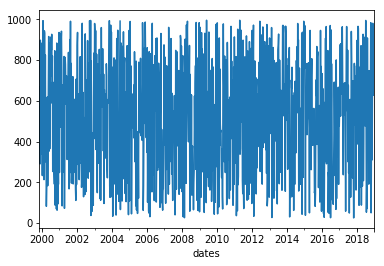

In [0]:
df['data'].plot()

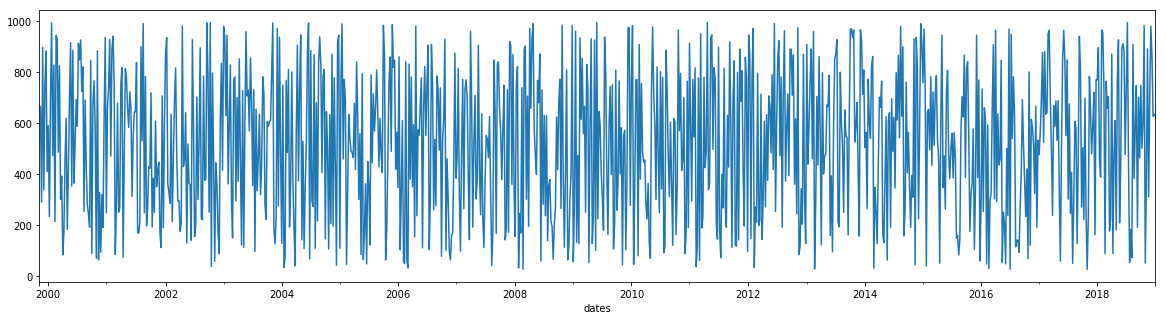

In [0]:
df['data'].plot(figsize=(20, 5))
plt.show()

In [0]:
df[(df.states == 'FL') & (df.status == 1) & (df.index == '2000-03-06')]  # For and use & and for or use |

,data,status,states
dates,,,


In [0]:
dt = df.groupby(['states', 'status']).apply(lambda x: pd.Series({
    'min': x['data'].min(),
    'max': x.data.max(),
    'sum': x.data.sum(),
    'mean': x.data.mean(),
    'count': x.data.count(),
    'earliest': x.index.min()
}))
pd.DataFrame(dt)
# dt

min  max    sum        mean  count   earliest
states status                                               
FL     1        26  991  62687  505.540323    124 2000-04-17
       2        43  996  54261  511.896226    106 2000-06-05
       3        28  996  65704  497.757576    132 1999-12-20
GA     1        27  987  26176  513.254902     51 1999-11-15
       2        30  984  26883  480.053571     56 1999-11-29
       3        40  994  30582  588.115385     52 2000-01-17
NY     1        33  984  52067  525.929293     99 1999-11-22
       2        38  983  59289  506.743590    117 1999-12-06
       3        25  991  67901  530.476562    128 1999-11-08
TX     1        58  964  24341  553.204545     44 2000-01-31
       2        26  972  24866  507.469388     49 2000-01-03
       3        37  932  22379  532.833333     42 2000-01-10

In [0]:
_ = df.groupby('states').apply(lambda x: x.data.mean())
pd.DataFrame(_)

,0
states,
FL,504.563536
GA,526.044025
NY,521.095930
TX,530.266667


In [0]:
df.groupby('states').apply(lambda x: x.data.mean())

states
FL    504.563536
GA    526.044025
NY    521.095930
TX    530.266667
dtype: float64

In [0]:
df.groupby(['states', 'status']).apply(lambda x: x.data.mean())

states  status
FL      1         505.540323
        2         511.896226
        3         497.757576
GA      1         513.254902
        2         480.053571
        3         588.115385
NY      1         525.929293
        2         506.743590
        3         530.476562
TX      1         553.204545
        2         507.469388
        3         532.833333
dtype: float64

In [0]:
dt = df.groupby(['states', 'status', 'dates']).sum()
dt


data
states status dates           
FL     1      2000-04-17   454
              2000-05-01   183
              2000-05-29   353
              2000-06-12   364
              2000-07-24   927
              2000-08-14   253
              2000-10-02    88
              2000-10-16   766
              2001-03-05   283
              2001-04-16    72
              2001-05-07   778
              2001-05-14   658
              2001-06-11   312
              2001-08-06   901
              2001-12-03   165
              2001-12-24   189
              2002-03-25   294
              2002-07-08   154
              2002-07-29   300
              2002-11-11    57
              2002-12-16   613
              2003-03-10   771
              2003-06-02   707
              2003-06-23   856
              2003-08-04   334
              2003-10-06   606
              2003-12-01   230
              2004-01-19    33
              2004-02-02   768
              2004-02-23   192
...                        ...
TX     3      2005-03-14   491
              2007-03-12   701
              2007-03-19   381
              2007-04-30   709
              2008-12-22   406
              2009-04-27   932
              2009-07-06   306
              2009-08-31   398
              2009-09-28   808
              2010-07-19   779
              2010-12-20   765
              2011-08-22   191
              2011-10-03   696
              2011-10-24   117
              2011-12-26   775
              2012-05-21   667
              2012-07-23   472
              2013-04-29   472
              2013-05-20   665
              2013-08-05   800
              2014-01-20   264
              2014-12-29   916
              2015-06-15   476
              2015-11-23   103
              2017-01-16   699
              2017-06-26   849
              2017-07-03   301
              2017-07-24   407
              2017-08-14   607
              2017-10-02   504

[1000 rows x 1 columns]

In [0]:
dt.index

MultiIndex(levels=[['FL', 'GA', 'NY', 'TX'], [1, 2, 3], [1999-11-08 00:00:00, 1999-11-15 00:00:00, 1999-11-22 00:00:00, 1999-11-29 00:00:00, 1999-12-06 00:00:00, 1999-12-13 00:00:00, 1999-12-20 00:00:00, 1999-12-27 00:00:00, 2000-01-03 00:00:00, 2000-01-10 00:00:00, 2000-01-17 00:00:00, 2000-01-24 00:00:00, 2000-01-31 00:00:00, 2000-02-07 00:00:00, 2000-02-14 00:00:00, 2000-02-21 00:00:00, 2000-02-28 00:00:00, 2000-03-06 00:00:00, 2000-03-13 00:00:00, 2000-03-20 00:00:00, 2000-03-27 00:00:00, 2000-04-03 00:00:00, 2000-04-10 00:00:00, 2000-04-17 00:00:00, 2000-04-24 00:00:00, 2000-05-01 00:00:00, 2000-05-08 00:00:00, 2000-05-15 00:00:00, 2000-05-22 00:00:00, 2000-05-29 00:00:00, 2000-06-05 00:00:00, 2000-06-12 00:00:00, 2000-06-19 00:00:00, 2000-06-26 00:00:00, 2000-07-03 00:00:00, 2000-07-10 00:00:00, 2000-07-17 00:00:00, 2000-07-24 00:00:00, 2000-07-31 00:00:00, 2000-08-07 00:00:00, 2000-08-14 00:00:00, 2000-08-21 00:00:00, 2000-08-28 00:00:00, 2000-09-04 00:00:00, 2000-09-11 00:00:00

In [0]:
dt.index.levels[0]

Index(['FL', 'GA', 'NY', 'TX'], dtype='object', name='states')

In [0]:
df.head()

,data,status,states
dates,,,
1999-11-08,667,3,NY
1999-11-15,663,1,GA
1999-11-22,290,1,NY
1999-11-29,898,2,GA
1999-12-06,338,2,NY


In [0]:
df.groupby(['states', 'status']).data.mean().to_frame('data_mean').head()

data_mean
states status            
FL     1       505.540323
       2       511.896226
       3       497.757576
GA     1       513.254902
       2       480.053571

In [0]:
pd.merge(
    df.reset_index(),
    df.groupby(['states', 'status']).data.mean().to_frame('data_mean').reset_index()
).sort_values(
    'dates'
).assign(
    deviation=lambda row: row.data - row.data_mean
)

,dates,data,status,states,data_mean,deviation
0,1999-11-08,667,3,NY,530.476562,136.523438
128,1999-11-15,663,1,GA,513.254902,149.745098
179,1999-11-22,290,1,NY,525.929293,-235.929293
278,1999-11-29,898,2,GA,480.053571,417.946429
334,1999-12-06,338,2,NY,506.743590,-168.743590
335,1999-12-13,747,2,NY,506.743590,240.256410
451,1999-12-20,883,3,FL,497.757576,385.242424
279,1999-12-27,410,2,GA,480.053571,-70.053571
583,2000-01-03,590,2,TX,507.469388,82.530612
632,2000-01-10,233,3,TX,532.833333,-299.833333


In [0]:
dt.loc['FL',1]

,data
dates,
2000-04-17,454
2000-05-01,183
2000-05-29,353
2000-06-12,364
2000-07-24,927
2000-08-14,253
2000-10-02,88
2000-10-16,766
2001-03-05,283


In [0]:
for state in dt.index.levels[0]:
  for status in dt.index.levels[1]:
    dt.loc[state, status].plot(figsize=(20, 5))
    print(state, status)
plt.show()

In [0]:
dt.loc['FL', 1]['2012-06':].plot()

In [0]:
sym = dt.groupby([dt.index.levels[0], dt.index.levels[2].year, dt.index.levels[2].month])
dt['Lower'] = sym['data'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
dt['Upper'] = sym['data'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
dt['Outlier'] = (dt['data'] < dt['Lower']) | (dt['data'] > dt['Upper']) 

dt = dt[dt['Outlier'] == False]

In [0]:
sym = dt.groupby([dt.index.get_level_values(0), dt.index.get_level_values(2).year, dt.index.get_level_values(2).month])
dt['Lower'] = sym['data'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
dt['Upper'] = sym['data'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
dt['Outlier'] = (dt['data'] < dt['Lower']) | (dt['data'] > dt['Upper']) 

dt = dt[dt['Outlier'] == False]

In [0]:
sym.sum()

In [0]:
dt

In [0]:
ALL = pd.DataFrame(dt['data'].groupby(dt.index.get_level_values(2)).sum())
ALL.columns = ['data'] # rename column
ALL.head()

In [0]:
YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])

ALL['Max'] = YearMonth['data'].transform(lambda x: x.max())
ALL.head()

# Introduction to Statistics

In [0]:
# Datasets
# --------
# https://raw.githubusercontent.com/amitkaps/weed/master/data/Demographics_State.csv
# https://raw.githubusercontent.com/amitkaps/weed/master/data/Population_State.csv
# https://raw.githubusercontent.com/amitkaps/weed/master/data/State_Location.csv
# https://github.com/amitkaps/weed/tree/master/data

## Basic Probability

Probability is a simple division of counts. Count of desirable outcome and total count of all outcomes.

$P(H|HHHTTHH)$

$P_P$ - Probability of Population and $P_S$ - Probability of Sample

$P_S \rightarrow P_P$ as my $S \rightarrow P$

For continuous variables, we can never know the probability of an exact event or measurement. We can only know this for a range of values. This range can denote the notion of 'tolerance'. the smaller the range, the more the data needed but the better the results. The larger the range, the lesser the data needed and less reliable are the rsults.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Mean, Median, Mode (Measure of Location)

***Median*** is a value that divides the data into 2 equally sized groups. 2nd Quartile. 50 percentile.

Half the time I am too large and half the times I am too small.

For continuous, median is resistant to errors due to outliers.

For categorical / discrete data, median is resistant to default values.

***Mode*** is a value that is the most probable value. The histogram is tallest over here and number of occurances is the maximum.

The chances of me being right are maximum.

For categorical / discrete, mode is giving the most probable value. So it's suseptible to default value.

***Mean*** is the average value of the data. Sum up all the data and divide by number of data points.

My difference between the actual and what I have said if going to be small.

For continuous, mean is suseptible to outlier.

In [0]:
X = np.random.randint(18, 60, 1000000)
fig, ax = plt.subplots(1, figsize=(15, 5))
sns.distplot(X, bins=100, ax=ax)
# plt.hist(X)
print(X)
plt.show()

## Uniform Distribution - All values are equal and have equal probability

$$\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

$$E = m

In [0]:
X = np.random.normal(150, 6, 1000000)  # Mu will be mean, median and mode
fig, ax = plt.subplots(1, figsize=(15, 5))
sns.distplot(X, bins=100, ax=ax)
# plt.hist(X)
print(X)
# plt.xlim([-40, 40])
plt.show()

## Normal distribution - Bell shape curve / distribution - Most common distribution in nature. Most important for a data scientist.
## Central Limit Theorm

# P(x = X) = 

In [0]:
X = np.random.poisson(lam=1000, size=100000)  # lam both mean and mode of the data but not always median
fig, ax = plt.subplots(1, figsize=(15, 5))
sns.distplot(X, bins=100, ax=ax)
# plt.hist(X)
print(X)
plt.show()

print(np.mean(X), np.std(X))

## Poisson Distribution. Normal for whole numbers.

In [0]:
X = np.random.binomial(250, 0.6, size=100000)
fig, ax = plt.subplots(1, figsize=(15, 5))
sns.distplot(X, bins=100, ax=ax)
# plt.hist(X)
print(X)
# plt.xlim([0, 25])
plt.show()

print(np.sqrt(250 * 0.6 * (1-0.6)), 250 * 0.6, np.mean(X), np.std(X))

print(1 - (np.std(X) * np.std(X)) / np.mean(X), np.mean(X) / (1 - (np.std(X) * np.std(X)) / np.mean(X)))

## Binomial Distribution. 10 coins <- n or number of attempts.
## Chances of Heads is 70% = 0.7 <- p or probability of success.
## How many times will I be successfull?

In [0]:
X = list(np.random.binomial(10, 0.7, size=1000000)) + list(np.random.binomial(10, 0.3, size=1000000))
fig, ax = plt.subplots(1, figsize=(15, 5))
sns.distplot(X, bins=100, ax=ax)
# plt.hist(X)
print(X)
plt.show()

In [0]:
X = list(np.random.binomial(10, 0.7, size=1000000)) + list(np.random.binomial(10, 0.22, size=1000000))
fig, ax = plt.subplots(1, figsize=(15, 5))
sns.distplot(X, bins=100, ax=ax)
# plt.hist(X)
print(X)
plt.show()

## Standard Deviation, Inter Quartile Range (Measure of Dispersion)

### Inter Quartile Range

1. Sort the data
2. Find a value that divides the data such that 25% of the data (or a quarter of the data) is below that value and 75% of the data is above (larger).
3. Find another value, this time dividing such that 75% of the data is below and 25% of the data is above.

0% - Minimum

25% - 1st Quartile (1 quarter below)

50% - 2nd Quartile or Median (2 quartes of data below)

75% - 3rd quartile (3 quarters of the data is below)

100% - Maximum

$IQR = Q_3 - Q_1$ Third Quartile minus First Quartile is your inter-quartile range.

$3 * IQR$ -> From your median + or - 1.5 * IQR is accepted region. Anything outside this region is outlier.

in data from 0 to 10 -> Uniform distribution

$Q_1 = 2.5$

$Q_2 = 5$

$Q_3 = 7.5$

$IQR = 7.5 - 2.5 = 5$

$Q_2 - 1.5 * IQR = 5 - 1.5* 5 = -2.5$

$Q_2 + 1.5 * IQR = 5 + 1.5 * 5 = 12.5$

In [0]:
sns.boxplot(list(np.log(np.random.randn(100000))) + [-10, 10])